<Figure size 800x600 with 0 Axes>

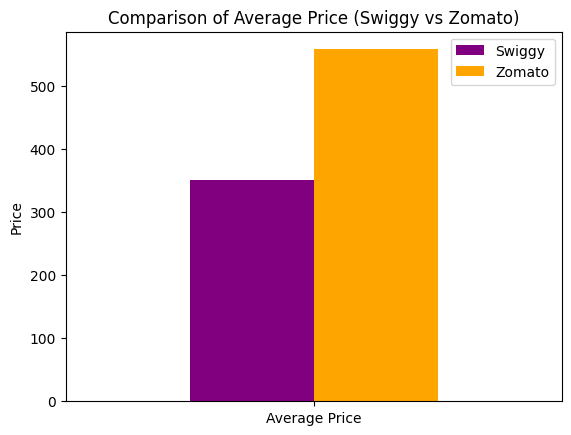

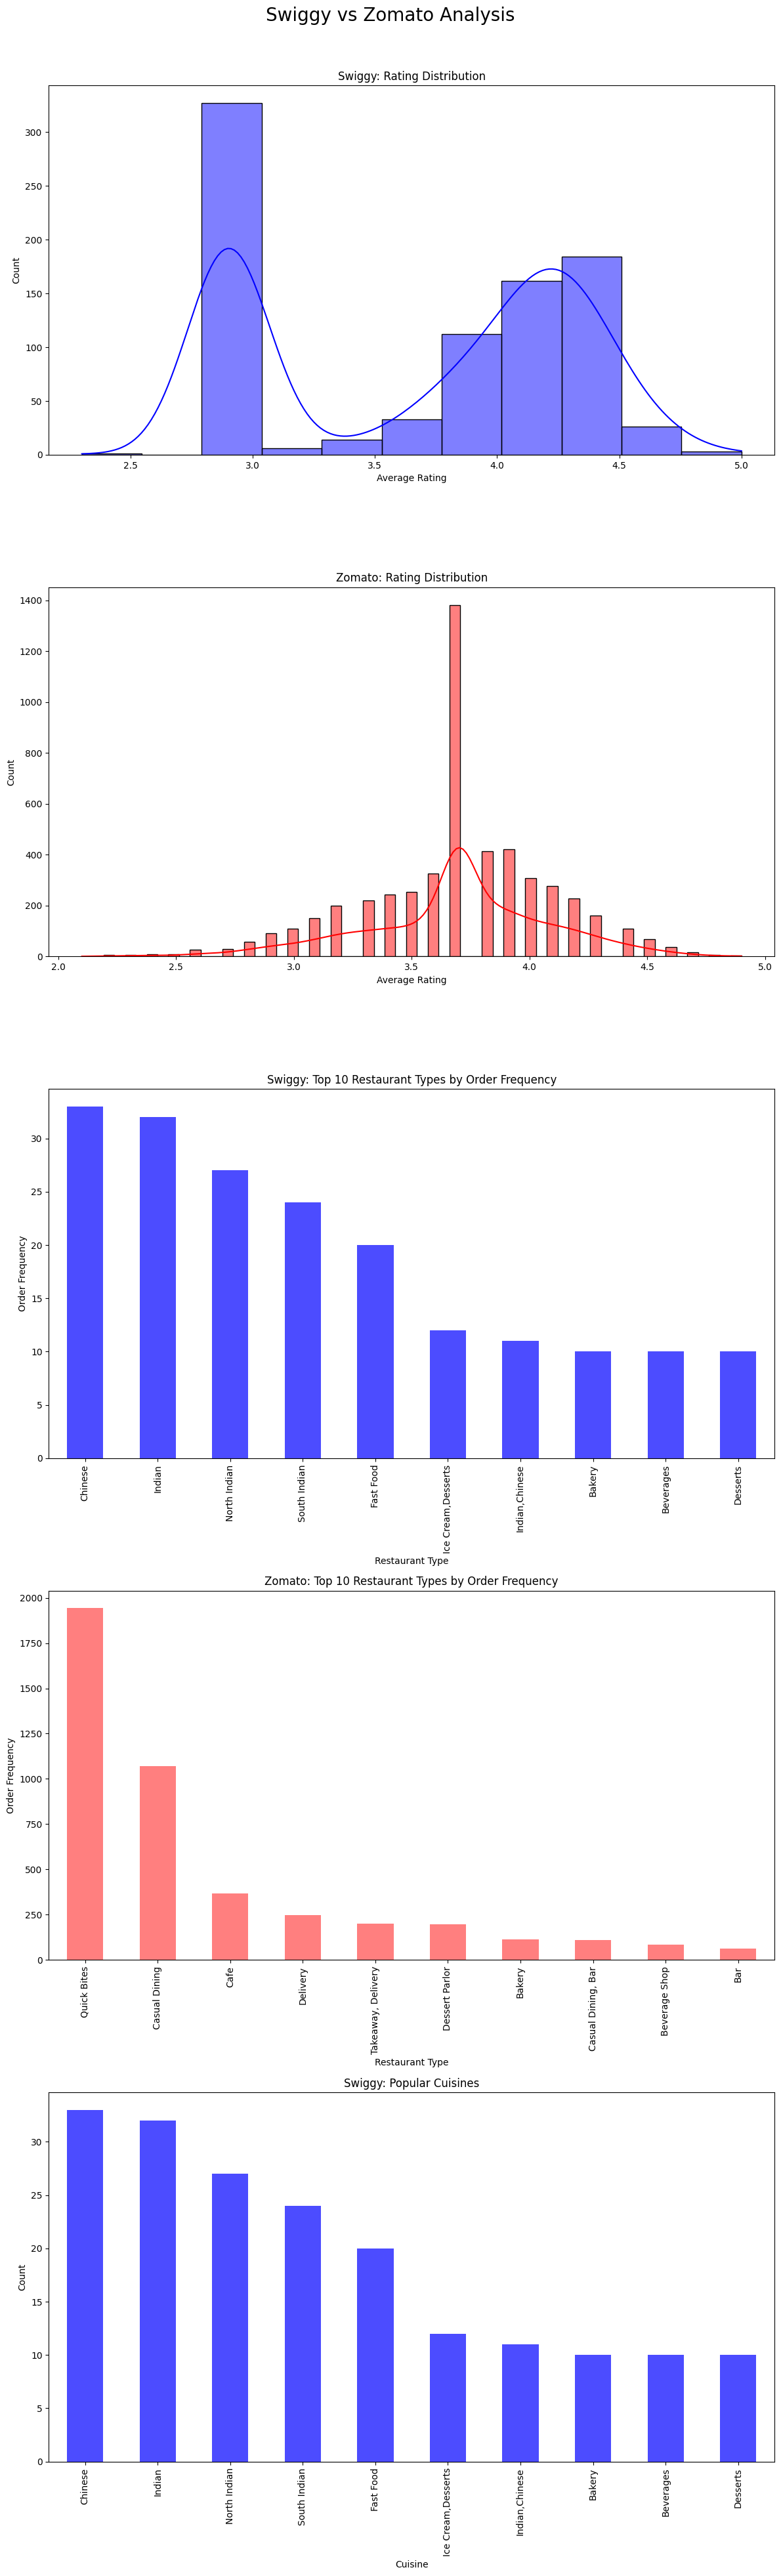

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets from CSV files
swiggy_df = pd.read_csv('C:/Users/Tanavi/OneDrive/Desktop/New folder/PROJECT/swiggy.csv')
zomato_df = pd.read_csv('C:/Users/Tanavi/OneDrive/Desktop/New folder/PROJECT/zomato.csv')

# Sample 10% of the data for faster processing during testing
swiggy_df = swiggy_df.sample(frac=0.1, random_state=42)
zomato_df = zomato_df.sample(frac=0.1, random_state=42)

# Handle missing values
swiggy_df.fillna({'Delivery time': swiggy_df['Delivery time'].mean()}, inplace=True)
zomato_df['rate'] = pd.to_numeric(zomato_df['rate'].str.split('/').str[0], errors='coerce')
zomato_df['rate'] = zomato_df['rate'].fillna(zomato_df['rate'].mean())

swiggy_df['Price'] = pd.to_numeric(swiggy_df['Price'], errors='coerce')
zomato_df['approx_cost(for two people)'] = pd.to_numeric(
    zomato_df['approx_cost(for two people)'].replace({',': '', '₹': ''}, regex=True), errors='coerce'
)

# Calculate average price for Swiggy and Zomato
prices = pd.DataFrame({
    "Swiggy": [swiggy_df['Price'].mean()],
    "Zomato": [zomato_df['approx_cost(for two people)'].mean()]
}, index=["Average Price"])

# 1. Price Comparison
plt.figure(figsize=(8, 6))
ax = prices.plot(kind='bar', color=['purple', 'orange'])
plt.title("Comparison of Average Price (Swiggy vs Zomato)")
plt.ylabel("Price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Set x-axis labels to straight line
plt.show()

# 2. Remaining graphs with increased length
fig, axes = plt.subplots(5, 1, figsize=(12, 40))  # Increased height for better visualization
fig.suptitle("Swiggy vs Zomato Analysis", fontsize=20)

# 2.1 Customer Ratings Distribution - Swiggy
sns.histplot(swiggy_df['Avg ratings'], color="blue", ax=axes[0], kde=True)
axes[0].set_title("Swiggy: Rating Distribution")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Count")

# 2.2 Customer Ratings Distribution - Zomato
sns.histplot(zomato_df['rate'], color="red", ax=axes[1], kde=True)
axes[1].set_title("Zomato: Rating Distribution")
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("Count")

# 2.3 Top 10 Restaurant Types by Order Frequency - Swiggy
swiggy_restaurant_type = swiggy_df['Food type'].value_counts().head(10)
swiggy_restaurant_type.plot(kind='bar', ax=axes[2], color="blue", alpha=0.7)
axes[2].set_title("Swiggy: Top 10 Restaurant Types by Order Frequency")
axes[2].set_xlabel("Restaurant Type")
axes[2].set_ylabel("Order Frequency")

# 2.4 Top 10 Restaurant Types by Order Frequency - Zomato
zomato_restaurant_type = zomato_df['rest_type'].value_counts().head(10)
zomato_restaurant_type.plot(kind='bar', ax=axes[3], color="red", alpha=0.5)
axes[3].set_title("Zomato: Top 10 Restaurant Types by Order Frequency")
axes[3].set_xlabel("Restaurant Type")
axes[3].set_ylabel("Order Frequency")

# 2.5 Cuisine Popularity - Swiggy
swiggy_cuisines = swiggy_df['Food type'].value_counts().head(10)
swiggy_cuisines.plot(kind='bar', ax=axes[4], color="blue", alpha=0.7)
axes[4].set_title("Swiggy: Popular Cuisines")
axes[4].set_xlabel("Cuisine")
axes[4].set_ylabel("Count")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [26]:
from IPython.core.display import HTML

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=0.8">
    <title>Restaurant Data Analysis Report</title>
    <style>
        /* General Body Styles */
        body {
            font-family: 'Arial', sans-serif;
            background-color: #f9f9f9;
            margin: 0;
            padding: 0;
            font-size: 14px;
            line-height: 1.6;
        }

        /* Header Styles */
        header {
            background-color: #4CAF50;
            color: white;
            text-align: center;
            padding: 15px 10px;
        }

        h1 {
            margin: 0;
            font-size: 18px;
            font-weight: 600;
        }

        /* Section Styles */
        .section {
            margin: 25px auto;
            padding: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            width: 85%;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }

        .section h2 {
            color: #333;
            font-size: 16px;
            margin-bottom: 10px;
            font-weight: 500;
        }

        .section img {
            width: 100%;  /* Full width for all images */
            height: auto;  /* Maintain aspect ratio */
            border-radius: 8px;
            margin: 15px auto;
            display: block;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        }

        /* Specific Styling for the First Graph */
        .first-graph img {
            width: 50%;  /* Smaller width for the first graph */
            margin: 20px auto;
            display: block;
        }

        /* Adjust Graph Height for All Other Graphs */
        .section:not(.first-graph) img {
            width: 100%;
            height: 600px;  /* Increased graph height for better visibility */
        }

        /* Media Query for Smaller Screens */
        @media (max-width: 768px) {
            body {
                font-size: 13px;
            }

            .section {
                width: 95%;
                padding: 15px;
            }

            .section img {
                width: 90%; /* Reduced width for responsiveness */
                height: auto; /* Maintain aspect ratio */
            }
        }
    </style>
</head>
<body>

<!-- Header Section -->
<header>
    <h1>Restaurant Data Analysis Report</h1>
</header>

<!-- Content Sections -->
<div class="section first-graph">
    <h2>1. Pricing Comparison (Swiggy vs Zomato)</h2>
    <img src="output_plots/price_comparison.png" alt="Pricing Comparison">
</div>

<div class="section">
    <h2>2. Customer Ratings Distribution</h2>
    <img src="output_plots/rating_distribution.png" alt="Customer Ratings Distribution">
</div>

<div class="section">
    <h2>3. Restaurant Type Comparison</h2>
    <img src="output_plots/restaurant_type_comparison.png" alt="Restaurant Type Comparison">
</div>

<div class="section">
    <h2>4. Cuisine Popularity and Ratings Comparison</h2>
    <img src="output_plots/cuisine_popularity_comparison.png" alt="Cuisine Popularity and Ratings">
</div>

<div class="section">
    <h2>5. Average Ratings for Cuisines</h2>
    <img src="output_plots/average_ratings_comparison.png" alt="Average Ratings for Cuisines">
</div>

<div class="section">
    <h2>6. Restaurant Count by Rating (Swiggy and Zomato)</h2>
    <img src="output_plots/restaurant_count_comparison.png" alt="Restaurant Count by Rating (Swiggy and Zomato)">
</div>

</body>
</html>
"""

# Display the HTML content in the notebook
HTML(html_content)
